## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  58.324053  1222.128416  0.735896  1.103569  1.425924
1  52.996389   650.680995  0.780748  5.497261  1.366972
2  41.986594   590.465303  0.449445  4.343555  1.528329
3  77.559629   948.671657  0.888890  3.094439  1.574123
4  85.568647  1722.003183  0.204755  5.204824  1.381151


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.04933 | train_mse: 6.41766 | train_mae: 1.68839 |  0:00:00s
epoch 1  | loss: 0.66629 | train_mse: 3.00505 | train_mae: 1.21855 |  0:00:00s


epoch 2  | loss: 0.747   | train_mse: 1.77462 | train_mae: 0.98424 |  0:00:00s
epoch 3  | loss: 0.69556 | train_mse: 1.84814 | train_mae: 1.02004 |  0:00:00s
epoch 4  | loss: 0.52892 | train_mse: 1.66618 | train_mae: 0.99242 |  0:00:00s


epoch 5  | loss: 0.42657 | train_mse: 1.29979 | train_mae: 0.86084 |  0:00:00s
epoch 6  | loss: 0.42479 | train_mse: 0.55185 | train_mae: 0.60494 |  0:00:00s
epoch 7  | loss: 0.34566 | train_mse: 0.62847 | train_mae: 0.62825 |  0:00:00s


epoch 8  | loss: 0.28721 | train_mse: 0.75074 | train_mae: 0.68102 |  0:00:01s
epoch 9  | loss: 0.34209 | train_mse: 0.71219 | train_mae: 0.64665 |  0:00:01s
epoch 10 | loss: 0.32469 | train_mse: 0.83832 | train_mae: 0.65728 |  0:00:01s


epoch 11 | loss: 0.23619 | train_mse: 1.02217 | train_mae: 0.68332 |  0:00:01s
epoch 12 | loss: 0.27239 | train_mse: 0.92974 | train_mae: 0.65506 |  0:00:01s
epoch 13 | loss: 0.20048 | train_mse: 0.69356 | train_mae: 0.59725 |  0:00:01s


epoch 14 | loss: 0.33157 | train_mse: 0.34391 | train_mae: 0.45851 |  0:00:01s
epoch 15 | loss: 0.35717 | train_mse: 0.26237 | train_mae: 0.38706 |  0:00:01s


epoch 16 | loss: 0.26207 | train_mse: 0.2663  | train_mae: 0.39595 |  0:00:01s
epoch 17 | loss: 0.35908 | train_mse: 0.38872 | train_mae: 0.46978 |  0:00:01s
epoch 18 | loss: 0.24337 | train_mse: 0.29178 | train_mae: 0.38913 |  0:00:01s


epoch 19 | loss: 0.26519 | train_mse: 0.41341 | train_mae: 0.46257 |  0:00:02s
epoch 20 | loss: 0.32184 | train_mse: 0.47988 | train_mae: 0.49396 |  0:00:02s
epoch 21 | loss: 0.26071 | train_mse: 0.28001 | train_mae: 0.38787 |  0:00:02s


epoch 22 | loss: 0.22931 | train_mse: 0.23217 | train_mae: 0.35834 |  0:00:02s
epoch 23 | loss: 0.21371 | train_mse: 0.20396 | train_mae: 0.33669 |  0:00:02s
epoch 24 | loss: 0.23576 | train_mse: 0.26136 | train_mae: 0.36738 |  0:00:02s


epoch 25 | loss: 0.22466 | train_mse: 0.23894 | train_mae: 0.36534 |  0:00:02s
epoch 26 | loss: 0.23909 | train_mse: 0.2454  | train_mae: 0.3669  |  0:00:02s
epoch 27 | loss: 0.16114 | train_mse: 0.21081 | train_mae: 0.3412  |  0:00:02s


epoch 28 | loss: 0.23867 | train_mse: 0.19825 | train_mae: 0.3298  |  0:00:02s
epoch 29 | loss: 0.28772 | train_mse: 0.18901 | train_mae: 0.3215  |  0:00:03s
epoch 30 | loss: 0.20699 | train_mse: 0.21082 | train_mae: 0.33989 |  0:00:03s


epoch 31 | loss: 0.24028 | train_mse: 0.22455 | train_mae: 0.34604 |  0:00:03s
epoch 32 | loss: 0.20804 | train_mse: 0.24816 | train_mae: 0.35724 |  0:00:03s
epoch 33 | loss: 0.18447 | train_mse: 0.23725 | train_mae: 0.34937 |  0:00:03s


epoch 34 | loss: 0.4113  | train_mse: 0.25751 | train_mae: 0.37737 |  0:00:03s
epoch 35 | loss: 0.30856 | train_mse: 0.22253 | train_mae: 0.35723 |  0:00:03s
epoch 36 | loss: 0.26484 | train_mse: 0.20434 | train_mae: 0.35623 |  0:00:03s


epoch 37 | loss: 0.18903 | train_mse: 0.18619 | train_mae: 0.34461 |  0:00:03s
epoch 38 | loss: 0.26755 | train_mse: 0.21068 | train_mae: 0.35839 |  0:00:03s
epoch 39 | loss: 0.23412 | train_mse: 0.21084 | train_mae: 0.33422 |  0:00:03s


epoch 40 | loss: 0.22002 | train_mse: 0.21935 | train_mae: 0.33659 |  0:00:03s
epoch 41 | loss: 0.23334 | train_mse: 0.17586 | train_mae: 0.31745 |  0:00:04s
epoch 42 | loss: 0.29789 | train_mse: 0.13369 | train_mae: 0.29351 |  0:00:04s


epoch 43 | loss: 0.14673 | train_mse: 0.16761 | train_mae: 0.3115  |  0:00:04s
epoch 44 | loss: 0.13703 | train_mse: 0.12431 | train_mae: 0.27703 |  0:00:04s
epoch 45 | loss: 0.24336 | train_mse: 0.11109 | train_mae: 0.26185 |  0:00:04s


epoch 46 | loss: 0.20718 | train_mse: 0.112   | train_mae: 0.25777 |  0:00:04s
epoch 47 | loss: 0.15305 | train_mse: 0.13517 | train_mae: 0.27065 |  0:00:04s
epoch 48 | loss: 0.21376 | train_mse: 0.11257 | train_mae: 0.26262 |  0:00:04s


epoch 49 | loss: 0.16125 | train_mse: 0.09448 | train_mae: 0.24643 |  0:00:04s
epoch 50 | loss: 0.12133 | train_mse: 0.11351 | train_mae: 0.25957 |  0:00:04s
epoch 51 | loss: 0.16292 | train_mse: 0.14361 | train_mae: 0.27984 |  0:00:04s


epoch 52 | loss: 0.17537 | train_mse: 0.18013 | train_mae: 0.31514 |  0:00:04s
epoch 53 | loss: 0.18619 | train_mse: 0.21966 | train_mae: 0.33734 |  0:00:05s
epoch 54 | loss: 0.19161 | train_mse: 0.24675 | train_mae: 0.34122 |  0:00:05s


epoch 55 | loss: 0.14469 | train_mse: 0.30749 | train_mae: 0.34881 |  0:00:05s
epoch 56 | loss: 0.24084 | train_mse: 0.27314 | train_mae: 0.32935 |  0:00:05s
epoch 57 | loss: 0.21871 | train_mse: 0.23968 | train_mae: 0.32279 |  0:00:05s


epoch 58 | loss: 0.2185  | train_mse: 0.2075  | train_mae: 0.32036 |  0:00:05s
epoch 59 | loss: 0.24529 | train_mse: 0.18482 | train_mae: 0.30921 |  0:00:05s


epoch 60 | loss: 0.23575 | train_mse: 0.14708 | train_mae: 0.27617 |  0:00:05s
epoch 61 | loss: 0.18747 | train_mse: 0.17254 | train_mae: 0.30557 |  0:00:05s


epoch 62 | loss: 0.25582 | train_mse: 0.14425 | train_mae: 0.29342 |  0:00:05s
epoch 63 | loss: 0.26222 | train_mse: 0.11741 | train_mae: 0.26872 |  0:00:06s
epoch 64 | loss: 0.13527 | train_mse: 0.11931 | train_mae: 0.27025 |  0:00:06s


epoch 65 | loss: 0.10297 | train_mse: 0.11608 | train_mae: 0.2737  |  0:00:06s


epoch 66 | loss: 0.19036 | train_mse: 0.09294 | train_mae: 0.24574 |  0:00:06s
epoch 67 | loss: 0.22955 | train_mse: 0.09066 | train_mae: 0.24523 |  0:00:06s


epoch 68 | loss: 0.16737 | train_mse: 0.09286 | train_mae: 0.25101 |  0:00:06s
epoch 69 | loss: 0.09832 | train_mse: 0.09436 | train_mae: 0.25655 |  0:00:06s
epoch 70 | loss: 0.13331 | train_mse: 0.08975 | train_mae: 0.24891 |  0:00:06s


epoch 71 | loss: 0.19798 | train_mse: 0.08201 | train_mae: 0.23097 |  0:00:06s
epoch 72 | loss: 0.22917 | train_mse: 0.10094 | train_mae: 0.24542 |  0:00:07s
epoch 73 | loss: 0.15698 | train_mse: 0.10345 | train_mae: 0.24808 |  0:00:07s


epoch 74 | loss: 0.18911 | train_mse: 0.1138  | train_mae: 0.25347 |  0:00:07s
epoch 75 | loss: 0.1289  | train_mse: 0.14919 | train_mae: 0.28085 |  0:00:07s
epoch 76 | loss: 0.12801 | train_mse: 0.19764 | train_mae: 0.32137 |  0:00:07s


epoch 77 | loss: 0.21091 | train_mse: 0.25027 | train_mae: 0.3517  |  0:00:07s
epoch 78 | loss: 0.10933 | train_mse: 0.22073 | train_mae: 0.32587 |  0:00:07s
epoch 79 | loss: 0.18419 | train_mse: 0.19837 | train_mae: 0.3098  |  0:00:07s


epoch 80 | loss: 0.21629 | train_mse: 0.14354 | train_mae: 0.27667 |  0:00:07s
epoch 81 | loss: 0.22078 | train_mse: 0.12994 | train_mae: 0.26776 |  0:00:07s


epoch 82 | loss: 0.17697 | train_mse: 0.13164 | train_mae: 0.26587 |  0:00:08s
epoch 83 | loss: 0.16375 | train_mse: 0.12669 | train_mae: 0.26051 |  0:00:08s
epoch 84 | loss: 0.11944 | train_mse: 0.0898  | train_mae: 0.22276 |  0:00:08s


epoch 85 | loss: 0.10332 | train_mse: 0.08402 | train_mae: 0.22438 |  0:00:08s
epoch 86 | loss: 0.17119 | train_mse: 0.11338 | train_mae: 0.24929 |  0:00:08s


epoch 87 | loss: 0.12497 | train_mse: 0.14068 | train_mae: 0.27367 |  0:00:08s
epoch 88 | loss: 0.11921 | train_mse: 0.14727 | train_mae: 0.27308 |  0:00:08s
epoch 89 | loss: 0.19673 | train_mse: 0.12261 | train_mae: 0.2525  |  0:00:08s


epoch 90 | loss: 0.16184 | train_mse: 0.119   | train_mae: 0.24951 |  0:00:08s
epoch 91 | loss: 0.11037 | train_mse: 0.09378 | train_mae: 0.23152 |  0:00:08s
epoch 92 | loss: 0.16383 | train_mse: 0.08756 | train_mae: 0.24134 |  0:00:09s


epoch 93 | loss: 0.10759 | train_mse: 0.06744 | train_mae: 0.20222 |  0:00:09s
epoch 94 | loss: 0.08291 | train_mse: 0.08566 | train_mae: 0.21147 |  0:00:09s
epoch 95 | loss: 0.09534 | train_mse: 0.09417 | train_mae: 0.21379 |  0:00:09s


epoch 96 | loss: 0.14772 | train_mse: 0.06767 | train_mae: 0.2095  |  0:00:09s
epoch 97 | loss: 0.10319 | train_mse: 0.08725 | train_mae: 0.23163 |  0:00:09s
epoch 98 | loss: 0.19399 | train_mse: 0.07965 | train_mae: 0.22129 |  0:00:09s


epoch 99 | loss: 0.18088 | train_mse: 0.08516 | train_mae: 0.22412 |  0:00:09s
epoch 100| loss: 0.10342 | train_mse: 0.08547 | train_mae: 0.22354 |  0:00:09s


epoch 101| loss: 0.10401 | train_mse: 0.0783  | train_mae: 0.21282 |  0:00:09s
epoch 102| loss: 0.23624 | train_mse: 0.0744  | train_mae: 0.21096 |  0:00:09s
epoch 103| loss: 0.15256 | train_mse: 0.06975 | train_mae: 0.20869 |  0:00:10s


epoch 104| loss: 0.13339 | train_mse: 0.05225 | train_mae: 0.18293 |  0:00:10s
epoch 105| loss: 0.10118 | train_mse: 0.06534 | train_mae: 0.2     |  0:00:10s
epoch 106| loss: 0.08287 | train_mse: 0.05464 | train_mae: 0.18355 |  0:00:10s


epoch 107| loss: 0.12543 | train_mse: 0.0589  | train_mae: 0.19285 |  0:00:10s
epoch 108| loss: 0.10021 | train_mse: 0.05743 | train_mae: 0.18761 |  0:00:10s
epoch 109| loss: 0.10019 | train_mse: 0.05636 | train_mae: 0.18226 |  0:00:10s


epoch 110| loss: 0.16652 | train_mse: 0.06144 | train_mae: 0.19416 |  0:00:10s
epoch 111| loss: 0.10562 | train_mse: 0.0618  | train_mae: 0.20333 |  0:00:10s
epoch 112| loss: 0.09081 | train_mse: 0.06593 | train_mae: 0.20847 |  0:00:10s


epoch 113| loss: 0.18119 | train_mse: 0.06997 | train_mae: 0.21405 |  0:00:10s
epoch 114| loss: 0.11354 | train_mse: 0.06297 | train_mae: 0.19132 |  0:00:10s
epoch 115| loss: 0.14701 | train_mse: 0.06464 | train_mae: 0.19456 |  0:00:11s


epoch 116| loss: 0.20221 | train_mse: 0.07196 | train_mae: 0.2047  |  0:00:11s
epoch 117| loss: 0.09392 | train_mse: 0.0735  | train_mae: 0.20425 |  0:00:11s


epoch 118| loss: 0.106   | train_mse: 0.0757  | train_mae: 0.2109  |  0:00:11s
epoch 119| loss: 0.14441 | train_mse: 0.0636  | train_mae: 0.19697 |  0:00:11s
epoch 120| loss: 0.09258 | train_mse: 0.08371 | train_mae: 0.21249 |  0:00:11s


epoch 121| loss: 0.27385 | train_mse: 0.07438 | train_mae: 0.1923  |  0:00:11s
epoch 122| loss: 0.1133  | train_mse: 0.05116 | train_mae: 0.18455 |  0:00:11s
epoch 123| loss: 0.11117 | train_mse: 0.05406 | train_mae: 0.18013 |  0:00:11s


epoch 124| loss: 0.08407 | train_mse: 0.05446 | train_mae: 0.17313 |  0:00:11s
epoch 125| loss: 0.23831 | train_mse: 0.0638  | train_mae: 0.19613 |  0:00:11s
epoch 126| loss: 0.07991 | train_mse: 0.063   | train_mae: 0.19215 |  0:00:12s


epoch 127| loss: 0.11861 | train_mse: 0.07746 | train_mae: 0.20955 |  0:00:12s
epoch 128| loss: 0.14265 | train_mse: 0.06784 | train_mae: 0.19895 |  0:00:12s
epoch 129| loss: 0.08654 | train_mse: 0.0482  | train_mae: 0.17388 |  0:00:12s


epoch 130| loss: 0.12446 | train_mse: 0.04856 | train_mae: 0.18125 |  0:00:12s
epoch 131| loss: 0.21346 | train_mse: 0.06092 | train_mae: 0.19405 |  0:00:12s
epoch 132| loss: 0.08739 | train_mse: 0.05536 | train_mae: 0.18557 |  0:00:12s


epoch 133| loss: 0.17709 | train_mse: 0.08342 | train_mae: 0.21133 |  0:00:12s
epoch 134| loss: 0.14095 | train_mse: 0.09751 | train_mae: 0.22363 |  0:00:12s
epoch 135| loss: 0.06812 | train_mse: 0.11114 | train_mae: 0.23429 |  0:00:12s


epoch 136| loss: 0.08409 | train_mse: 0.12045 | train_mae: 0.24007 |  0:00:12s
epoch 137| loss: 0.16768 | train_mse: 0.13737 | train_mae: 0.25414 |  0:00:13s
epoch 138| loss: 0.08122 | train_mse: 0.09806 | train_mae: 0.22571 |  0:00:13s


epoch 139| loss: 0.07694 | train_mse: 0.06112 | train_mae: 0.18291 |  0:00:13s
epoch 140| loss: 0.13066 | train_mse: 0.05806 | train_mae: 0.18548 |  0:00:13s
epoch 141| loss: 0.07892 | train_mse: 0.0721  | train_mae: 0.20203 |  0:00:13s


epoch 142| loss: 0.10221 | train_mse: 0.08388 | train_mae: 0.20659 |  0:00:13s
epoch 143| loss: 0.18599 | train_mse: 0.08593 | train_mae: 0.2082  |  0:00:13s


epoch 144| loss: 0.15715 | train_mse: 0.07083 | train_mae: 0.19262 |  0:00:13s
epoch 145| loss: 0.0814  | train_mse: 0.07203 | train_mae: 0.20059 |  0:00:13s


epoch 146| loss: 0.13173 | train_mse: 0.06738 | train_mae: 0.19803 |  0:00:13s
epoch 147| loss: 0.1049  | train_mse: 0.05397 | train_mae: 0.17836 |  0:00:14s
epoch 148| loss: 0.12842 | train_mse: 0.07225 | train_mae: 0.20026 |  0:00:14s


epoch 149| loss: 0.0863  | train_mse: 0.12503 | train_mae: 0.24523 |  0:00:14s
epoch 150| loss: 0.14986 | train_mse: 0.13303 | train_mae: 0.24703 |  0:00:14s
epoch 151| loss: 0.23425 | train_mse: 0.12476 | train_mae: 0.23353 |  0:00:14s


epoch 152| loss: 0.15043 | train_mse: 0.14763 | train_mae: 0.25429 |  0:00:14s
epoch 153| loss: 0.10678 | train_mse: 0.13815 | train_mae: 0.25383 |  0:00:14s
epoch 154| loss: 0.0948  | train_mse: 0.10138 | train_mae: 0.22115 |  0:00:14s


epoch 155| loss: 0.1074  | train_mse: 0.07669 | train_mae: 0.19818 |  0:00:14s
epoch 156| loss: 0.12235 | train_mse: 0.07676 | train_mae: 0.19529 |  0:00:14s
epoch 157| loss: 0.08268 | train_mse: 0.06308 | train_mae: 0.19093 |  0:00:14s


epoch 158| loss: 0.09622 | train_mse: 0.05148 | train_mae: 0.18044 |  0:00:14s
epoch 159| loss: 0.08448 | train_mse: 0.06674 | train_mae: 0.19366 |  0:00:15s
epoch 160| loss: 0.18582 | train_mse: 0.08123 | train_mae: 0.20475 |  0:00:15s


epoch 161| loss: 0.08479 | train_mse: 0.07694 | train_mae: 0.19741 |  0:00:15s
epoch 162| loss: 0.12654 | train_mse: 0.06407 | train_mae: 0.19545 |  0:00:15s
epoch 163| loss: 0.22311 | train_mse: 0.07769 | train_mae: 0.21092 |  0:00:15s


epoch 164| loss: 0.1407  | train_mse: 0.07622 | train_mae: 0.20402 |  0:00:15s
epoch 165| loss: 0.12318 | train_mse: 0.06775 | train_mae: 0.1932  |  0:00:15s
epoch 166| loss: 0.09654 | train_mse: 0.07349 | train_mae: 0.20928 |  0:00:15s


epoch 167| loss: 0.10009 | train_mse: 0.10703 | train_mae: 0.24351 |  0:00:15s
epoch 168| loss: 0.07869 | train_mse: 0.13052 | train_mae: 0.25828 |  0:00:15s
epoch 169| loss: 0.12712 | train_mse: 0.12971 | train_mae: 0.25537 |  0:00:15s


epoch 170| loss: 0.12089 | train_mse: 0.12266 | train_mae: 0.24918 |  0:00:15s
epoch 171| loss: 0.10532 | train_mse: 0.07123 | train_mae: 0.20042 |  0:00:16s


epoch 172| loss: 0.11767 | train_mse: 0.05876 | train_mae: 0.19129 |  0:00:16s
epoch 173| loss: 0.07253 | train_mse: 0.06721 | train_mae: 0.20795 |  0:00:16s
epoch 174| loss: 0.19258 | train_mse: 0.07797 | train_mae: 0.2086  |  0:00:16s

Early stopping occurred at epoch 174 with best_epoch = 124 and best_train_mae = 0.17313
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

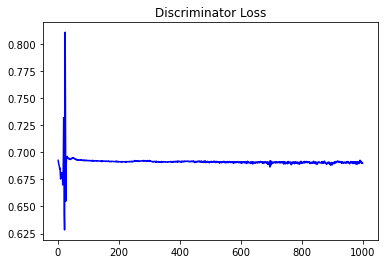

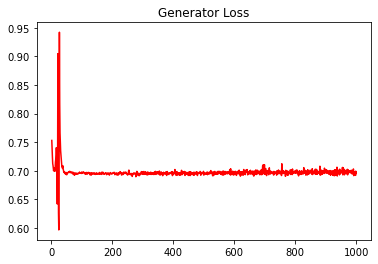

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.424060113403297


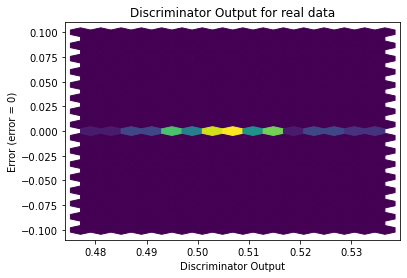

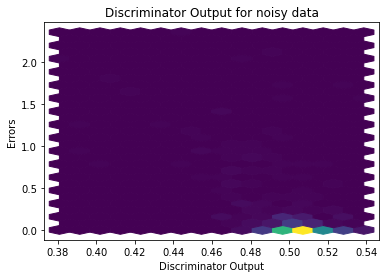

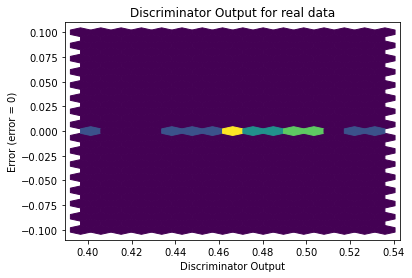

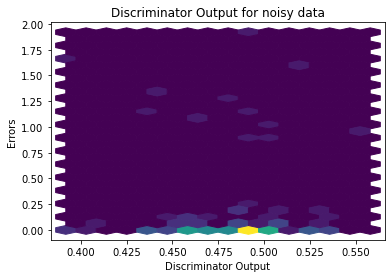

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


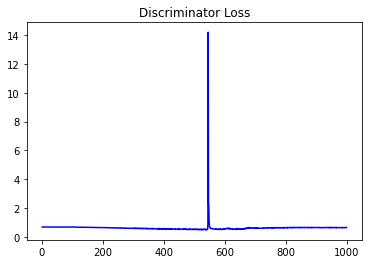

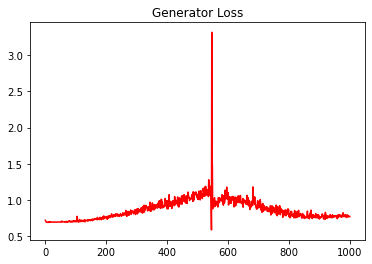

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4913080386435632


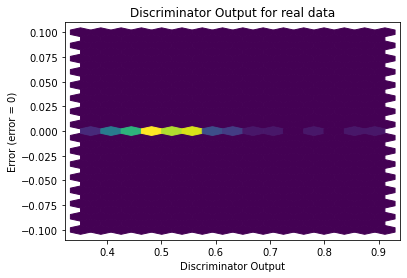

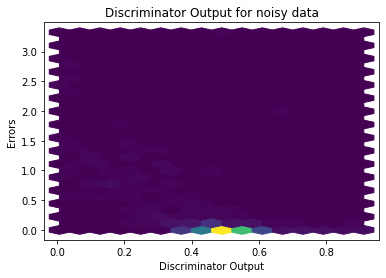

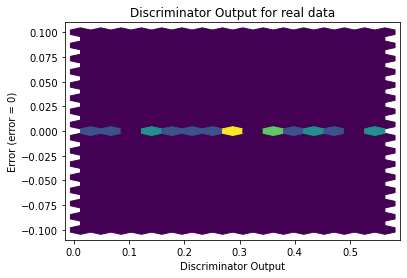

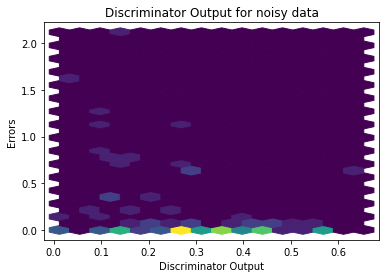

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0810]], requires_grad=True)
